## Bipartite Graphs

### Problem

Given a set of users and their ratings of movies, find users who have similar tastes in movies.

### Solution 

We can model this problem as a bipartite graph, where the users and movies are two separate sets of nodes, and the edges connect users to the movies they have rated. We can then use NetworkX to find the nodes that are most similar based on their ratings.

In this example, we define the user ratings of the movies as a dictionary, where each key is a user and the value is another dictionary representing the movies they have rated and the corresponding ratings. We then create a bipartite graph and add the nodes and edges based on the ratings. We draw the bipartite graph to visualize it, and then use the overlap_weighted_cocitation function to calculate the similarity between nodes based on their ratings.

This is just another example of how graphs can be used to solve real-world problems. With NetworkX, we can model and analyze complex networks of all kinds, from social networks to biological networks to transportation networks, and much more.

In [1]:
import networkx as nx
import matplotlib.pyplot as plt

In [2]:
# Define the user ratings of the movies
ratings = {
    'User1': {
        'Movie1': 4,
        'Movie2': 3,
        'Movie3': 5
    },
    'User2': {
        'Movie1': 3,
        'Movie3': 4,
        'Movie4': 2
    },
    'User3': {
        'Movie2': 5,
        'Movie3': 4,
        'Movie5': 3
    },
    'User4': {
        'Movie1': 2,
        'Movie2': 3,
        'Movie5': 4
    }
}

In [3]:
# Create a bipartite graph and add the nodes and edges
B = nx.Graph()
B.add_nodes_from(ratings.keys(), bipartite=0)
B.add_nodes_from([m for u in ratings for m in ratings[u]], bipartite=1)
B.add_edges_from([(u, m, {'weight': r}) for u in ratings for m, r in ratings[u].items()])

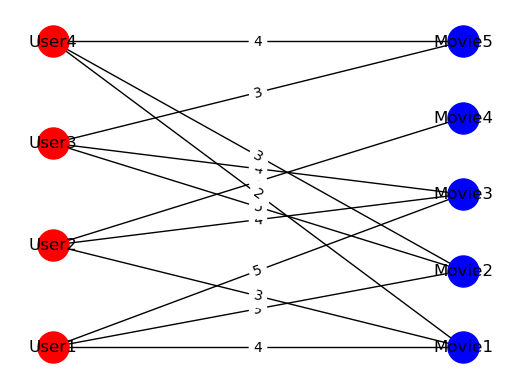

In [4]:
# Draw the bipartite graph
pos = nx.bipartite_layout(B, [n for n, d in B.nodes(data=True) if d['bipartite']==0])
nx.draw_networkx_nodes(B, pos, node_size=500, node_color='r', nodelist=[n for n, d in B.nodes(data=True) if d['bipartite']==0])
nx.draw_networkx_nodes(B, pos, node_size=500, node_color='b', nodelist=[n for n, d in B.nodes(data=True) if d['bipartite']==1])
nx.draw_networkx_labels(B, pos)
nx.draw_networkx_edges(B, pos)
nx.draw_networkx_edge_labels(B, pos, edge_labels={(u, m): r['weight'] for u, m, r in B.edges(data=True)})
plt.axis('off')
plt.show()

In [5]:
#Left and Right sets of the graph
left, right = nx.bipartite.sets(B)
left, right

({'User1', 'User2', 'User3', 'User4'},
 {'Movie1', 'Movie2', 'Movie3', 'Movie4', 'Movie5'})

In [6]:
#Returns the maximum cardinality matching in the given bipartite graph.
nx.bipartite.maximum_matching(B)

{'User2': 'Movie1',
 'User3': 'Movie2',
 'User4': 'Movie5',
 'User1': 'Movie3',
 'Movie2': 'User3',
 'Movie1': 'User2',
 'Movie3': 'User1',
 'Movie5': 'User4'}